In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0]==y_train.shape[0])
assert(X_test.shape[0]==y_test.shape[0])
assert(X_train.shape[1:] == (28,28)), "The dimension of the images are not 28*28"
assert(X_test.shape[1:] == (28,28)), "The dimension of the images are not 28*28"

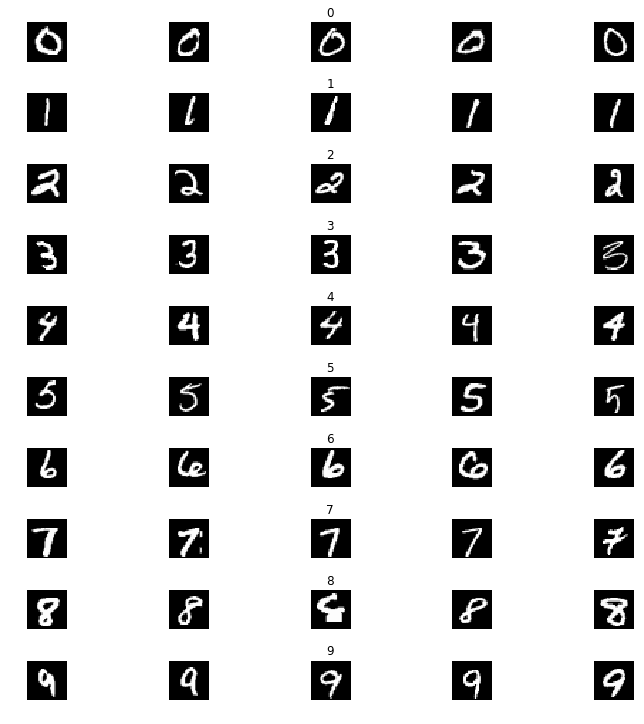

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (10, 10))
fig.tight_layout()
for i in range (cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of image')

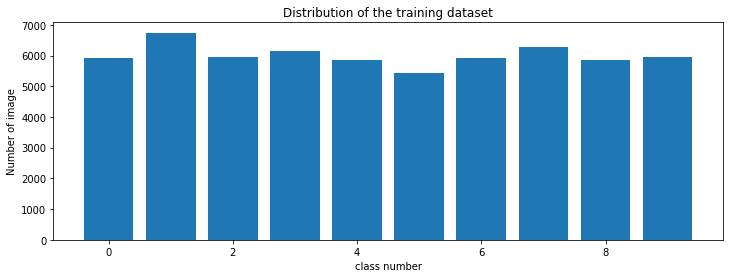

In [7]:
print(num_of_samples)
plt.figure(figsize =(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("Number of image")

In [8]:
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(30, activation = "relu"))
    model.add(Dense(10, activation = "relu"))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [12]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
history = model.fit(X_train, y_train, validation_split =0.1, epochs =10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 49us/step - loss: 1.7423 - acc: 0.3814 - val_loss: 1.7245 - val_acc: 0.3870
Epoch 2/10
54000/54000 [==============================] - 3s 50us/step - loss: 1.7033 - acc: 0.3956 - val_loss: 1.7099 - val_acc: 0.3858
Epoch 3/10
54000/54000 [==============================] - 3s 49us/step - loss: 1.6946 - acc: 0.3953 - val_loss: 1.7109 - val_acc: 0.3923
Epoch 4/10
54000/54000 [==============================] - 3s 52us/step - loss: 1.6879 - acc: 0.3980 - val_loss: 1.7095 - val_acc: 0.3848
Epoch 5/10
54000/54000 [==============================] - 3s 53us/step - loss: 1.6795 - acc: 0.4017 - val_loss: 1.7044 - val_acc: 0.3957
Epoch 6/10
54000/54000 [==============================] - 3s 52us/step - loss: 1.6750 - acc: 0.4006 - val_loss: 1.7131 - val_acc: 0.3860
Epoch 7/10
54000/54000 [==============================] - 3s 50us/step - loss: 1.6727 - acc: 0.4028 - val_loss: 1.7123 - val_acc:

Text(0.5,0,'epoch')

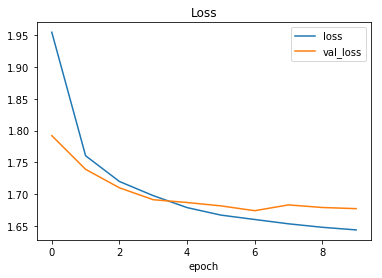

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

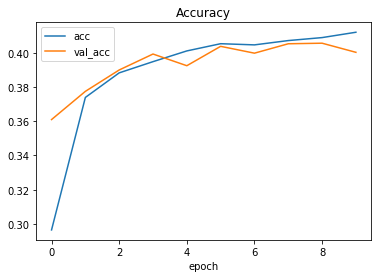

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score is :', score[0])
print('Test Accuracy is :', score[1])

<type 'list'>
('Test score is :', 1.7008201446533202)
('Test Accuracy is :', 0.3945)


<Response [200]>


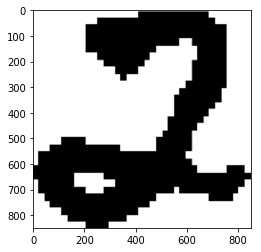

In [17]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

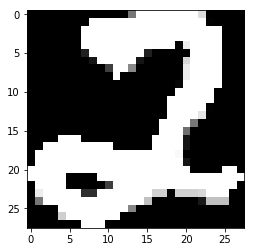

In [18]:
import cv2


img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))
print(image)

In [19]:
image = image/255
image = image.reshape(1, 784)


In [20]:
prediction = model.predict_classes(image)
print("Predicited digit:", str(prediction))

('Predicited digit:', '[2]')
